In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import shift
from tqdm.notebook import tqdm

In [2]:
data = np.load('../XPCSData/images_256.npy').astype(np.float32)
print(data.shape)
print(data.dtype)

(3986, 256, 256)
float32


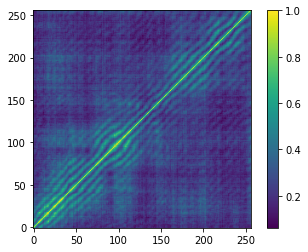

In [3]:
i=-300
plt.imshow(data[i], origin='lower')
plt.colorbar()

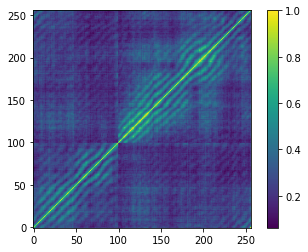

In [4]:
shiftd = 100
a = shift(data[i],shiftd,mode='wrap')
plt.imshow(a, origin='lower')
plt.colorbar()

### Augment training data with shifts (with wrapping) along axis

In [5]:
shifts = 99
augmented_data = []
for i in tqdm(range (data.shape[0])):
    augmented_data.append(data[i])
    for j in range (shifts):
        shiftd = np.random.randint(data.shape[1]) #Shift a random amount up to array size
        augmented_data.append(shift(data[i],shiftd,mode='wrap'))

augmented_data = np.array(augmented_data)
augmented_data = np.expand_dims(augmented_data, axis=1)
print(augmented_data.shape)
print(augmented_data.dtype)

  0%|          | 0/3986 [00:00<?, ?it/s]

(398600, 1, 256, 256)
float32


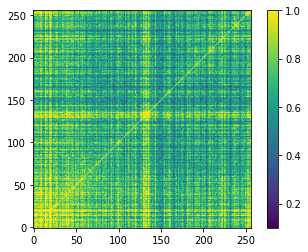

In [6]:
i=47
plt.imshow(augmented_data[i].squeeze(), origin='lower')
plt.colorbar()

In [7]:
#Save as float32
np.save('100X_augmented_images.npy', 
        augmented_data.astype(np.float32))